Student: Tania Shokor

ISU: 313320

# Lab №2


## Solution

### 0. Import necessary libraries

To successfully install and import roboticstoolbox-python, the follwoing code blocks were added.

In [1]:
!git clone https://github.com/petercorke/robotics-toolbox-python.git
%cd robotics-toolbox-python
!pip install -e .

Cloning into 'robotics-toolbox-python'...
remote: Enumerating objects: 27011, done.
remote: Counting objects: 100% (724/724), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 27011 (delta 663), reused 618 (delta 618), pack-reused 26287 (from 2)
Receiving objects: 100% (27011/27011), 174.11 MiB | 28.76 MiB/s, done.
Resolving deltas: 100% (19130/19130), done.
Updating files: 100% (1980/1980), done.
/content/robotics-toolbox-python
Obtaining file:///content/robotics-toolbox-python
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193

In [2]:
!pip install numpy==1.24.3 scipy==1.9.3 matplotlib==3.7.1 roboticstoolbox-python==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 139.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 156.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
  Attempting uninstall: matplotlib
    Found existing installation

In [4]:
!pip install swift-sim

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import spatialmath.base as sb

### 1. Import model UR5

In [29]:
robot = rtb.models.DH.UR5()
print(robot)

DHRobot: UR5 (by Universal Robotics), 6 joints (RRRRRR), dynamics, standard DH parameters
┌─────┬─────────┬─────────┬────────┐
│ θⱼ  │   dⱼ    │   aⱼ    │   ⍺ⱼ   │
├─────┼─────────┼─────────┼────────┤
│  q1 │ 0.08946 │       0 │  90.0° │
│  q2 │       0 │  -0.425 │   0.0° │
│  q3 │       0 │ -0.3922 │   0.0° │
│  q4 │  0.1091 │       0 │  90.0° │
│  q5 │ 0.09465 │       0 │ -90.0° │
│  q6 │  0.0823 │       0 │   0.0° │
└─────┴─────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬───────┬─────┬─────┬─────┬──────┬─────┐
│ name │ q0    │ q1  │ q2  │ q3  │ q4   │ q5  │
├──────┼───────┼─────┼─────┼─────┼──────┼─────┤
│   qr │  180° │  0° │  0° │  0° │  90° │  0° │
│   qz │  0°   │  0° │  0° │  0° │  0°  │  0° │
└──────┴───────┴─────┴─────┴─────┴──────┴─────┘



### 2. Set an initial point of the robot and plot it

In [30]:
import matplotlib
matplotlib.use('agg') # added to fix issue with plotting

In [31]:
q_start = [pi/4, -pi/3, -pi/4, pi/3, -pi/3, pi/4]

plt.figure()
robot.plot(q_start, backend='pyplot')
plt.savefig('start_pos.png', dpi=150, bbox_inches='tight')
plt.close()

Start Position:


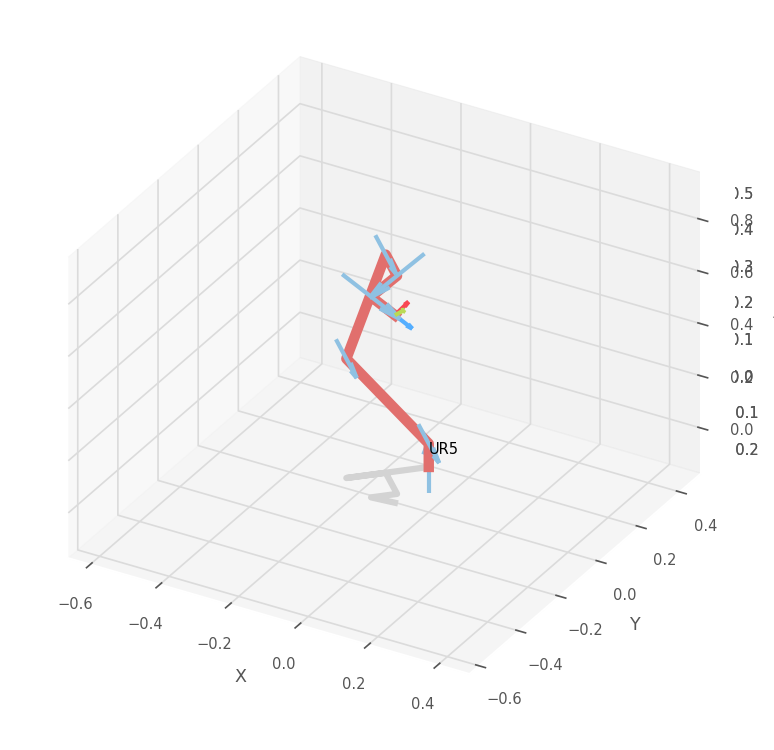

In [32]:
# Display saved images to show the start position of the robot
from IPython.display import Image
print("Start Position:")
display(Image('start_pos.png'))

### 3. Solve Forwards Kinematics Probelm

T_start is the pose of the robot end-effector as an SE3 object for the joint configuration q_start.

In [33]:
T_start = robot.fkine(q_start)
print(T_start)

   0.09732   0.6098    0.7866    0.01612   
   0.9633   -0.2562    0.07946  -0.1964    
   0.25      0.75     -0.6124    0.7191    
   0         0         0         1         



### 6. Construct the working zone of the manipulator

Initialize the variables.

In [34]:
# added qlim since without it some joint limits are not defined leading to errors in the next code block
for i in range(robot.n):
    if robot.links[i].qlim is None:
        robot.links[i].qlim = [-2*pi, 2*pi]

In [35]:
n = 20  # Количество точек по каждой оси
i = 0  # Просто счетчик
move = [np.linspace(robot.links[i].qlim[0], robot.links[i].qlim[1], n) for i in range(3)]  # Записываем пределы перемещения для первых трех звеньев
pose = np.zeros([3,n**3])  # Создаем пустой массив для записи данных

Calculate the working zone

In [36]:
# Проходимся перебором по каждой точке
for q1 in move[0]:
    for q2 in move[1]:
        for q3 in move[2]:
            Tt = robot.fkine([q1,q2,q3,0,0,0])  # Решаем ПЗК, меняя только первые 3 обобщенных координаты
            for j in range(3):
                pose[j][i] = Tt.t[j]  # Сохраняем точку
            i += 1

Construct the working zone

In [37]:
plt.figure(figsize=(8,8), dpi=300)
ax = plt.axes(projection="3d")
ax.plot3D(pose[0], pose[1], pose[2], color='red', linewidth=0.15)
ax.scatter3D(pose[0], pose[1], pose[2], s=0.5, color='red')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.savefig('working_zone.png', dpi=150, bbox_inches='tight')
plt.show()

Working Zone:


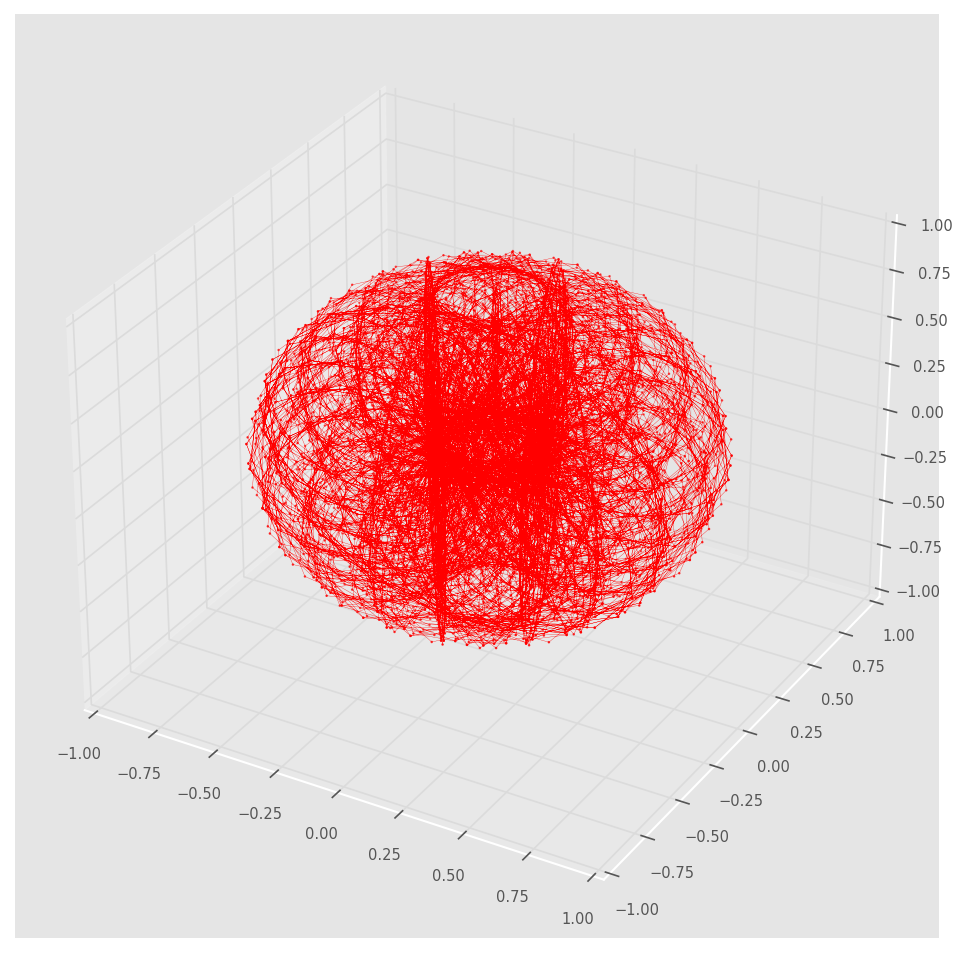

In [38]:
print("Working Zone:")
display(Image('working_zone.png'))

### 7. Choose the end point and check it (solve inverse kinematics)

The suggested robot.ikine_GN is not included within the chosen robot UR5. And so, another method was chosen, which is ikine_LM.

ikine-LM is a Levenberg-Marquardt numerical solver.

In [39]:
from spatialmath import SE3
point = [-0.5,0.1,0.2]
T_end = SE3.Trans(point)
q_end = robot.ikine_LM(T_end).q  # Есть другие методы, помимо ikine_GN
robot.plot(q_end)
plt.savefig('end_pose_test.png', dpi=150, bbox_inches='tight')
plt.show()

End Position:


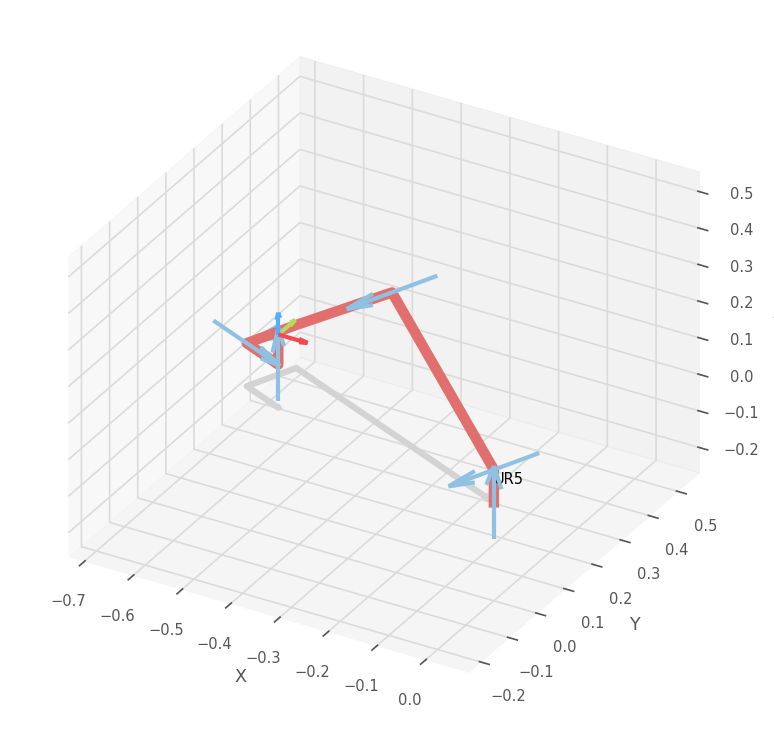

In [40]:
print("End Position:")
display(Image('end_pose_test.png'))

### 8. Plan the trajectory

Plan the trajectory using 'jtraj' method for $N$ = 100 points.

jtraj is a joint space trajectory where the joint coordinates vary from q_start to q_end. The trajectory length is defined by the length of the time vector "time".

In [41]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)

tr_jtraj = rtb.jtraj(q_start, q_end, time)

Plan the same trajectory using 'mtraj' method with trapezoidal function.

mtraj is a multi-axis trajectory varying from q_start to q_end according to the scalar trajectory function tfunc in the time range. The shape of the trajectory is given by the scalar trajectory function tfunc, which is trapezoidal in our case.

In [42]:
tr_trap = rtb.mtraj(rtb.trapezoidal, q_start, q_end, time)

Plan the same trajectory using 'mtraj' method with quintic function.

The shape of the trajectory in this case is a quintic polynomial.

In [43]:
tr_quin = rtb.mtraj(rtb.quintic, q_start, q_end, time)

### 9. Plot graphs

Plot graphs of position for each link

In [44]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.q[i][g-1] for i in range(len(tr_jtraj.q))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.q[i][g-1] for i in range(len(tr_trap.q))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.q[i][g-1] for i in range(len(tr_quin.q))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Position of link {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$q$  [$rad$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X

plt.savefig('graphs_pos.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

Plot graphs of velocity for each link

In [45]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.25, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qd[i][g-1] for i in range(len(tr_jtraj.qd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qd[i][g-1] for i in range(len(tr_trap.qd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qd[i][g-1] for i in range(len(tr_quin.qd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Velocity of link {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"$dq/dt$  [$rad/sec$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.savefig('graphs_vel.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

Plot graphs of acceleration for each link

In [46]:
fig = plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(1,7):
    plt.subplot(2,3,g)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    traektoriya_jtraj = [tr_jtraj.qdd[i][g-1] for i in range(len(tr_jtraj.qdd))]  # Извлекаем нужные данные
    traektoriya_trap = [tr_trap.qdd[i][g-1] for i in range(len(tr_trap.qdd))]  # Извлекаем нужные данные
    traektoriya_quin = [tr_quin.qdd[i][g-1] for i in range(len(tr_quin.qdd))]  # Извлекаем нужные данные
    plt.plot(time, traektoriya_jtraj, linestyle='-', linewidth=2, color=(1,0,0), label=r"jtraj")  # Рисуем линию
    plt.plot(time, traektoriya_trap, linestyle='-', linewidth=2, color=(0,1,0), label=r"lspb")  # Рисуем линию
    plt.plot(time, traektoriya_quin, linestyle='--', linewidth=2, color=(0,0,1), label=r"tpoly")  # Рисуем линию
    plt.title(r"Accelration of link {}".format(g), fontsize=10)  # Название графика
    plt.ylabel(r"${d^2}q/d{t^2}$  [$rad/{sec}^2$]", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$t$  [$sec$]", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.savefig('graphs_acc.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

Graphs of position:


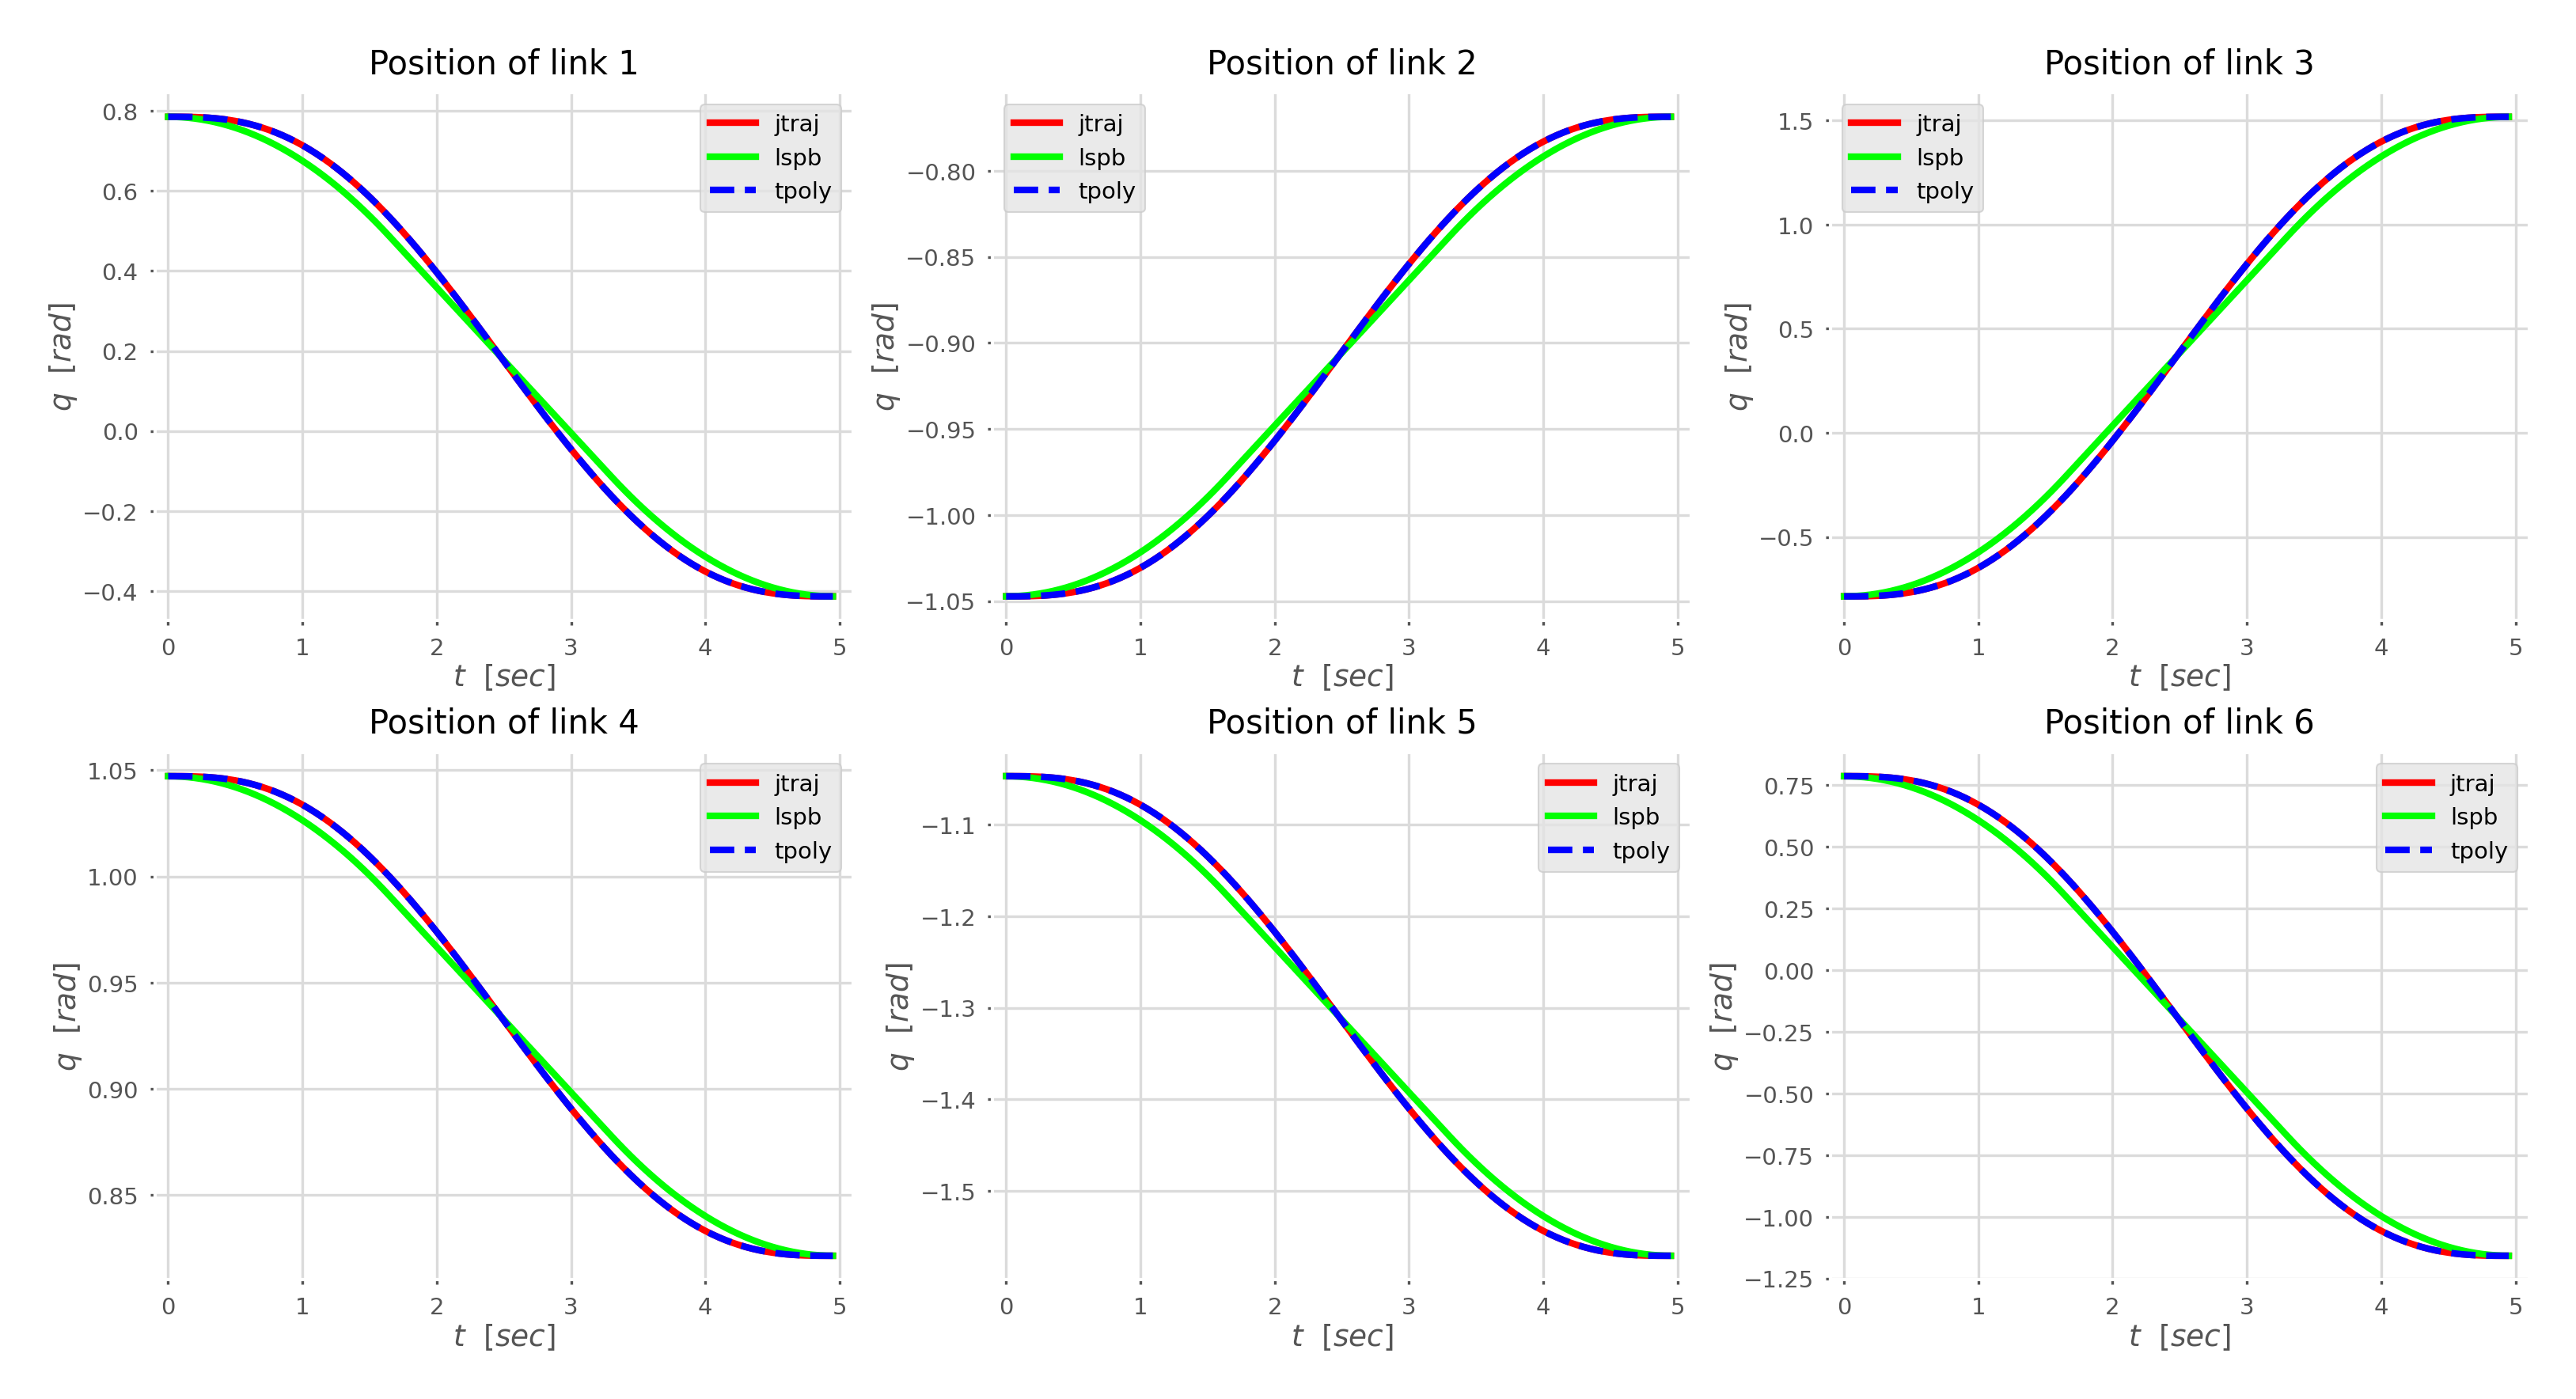


Graphs of velocity:


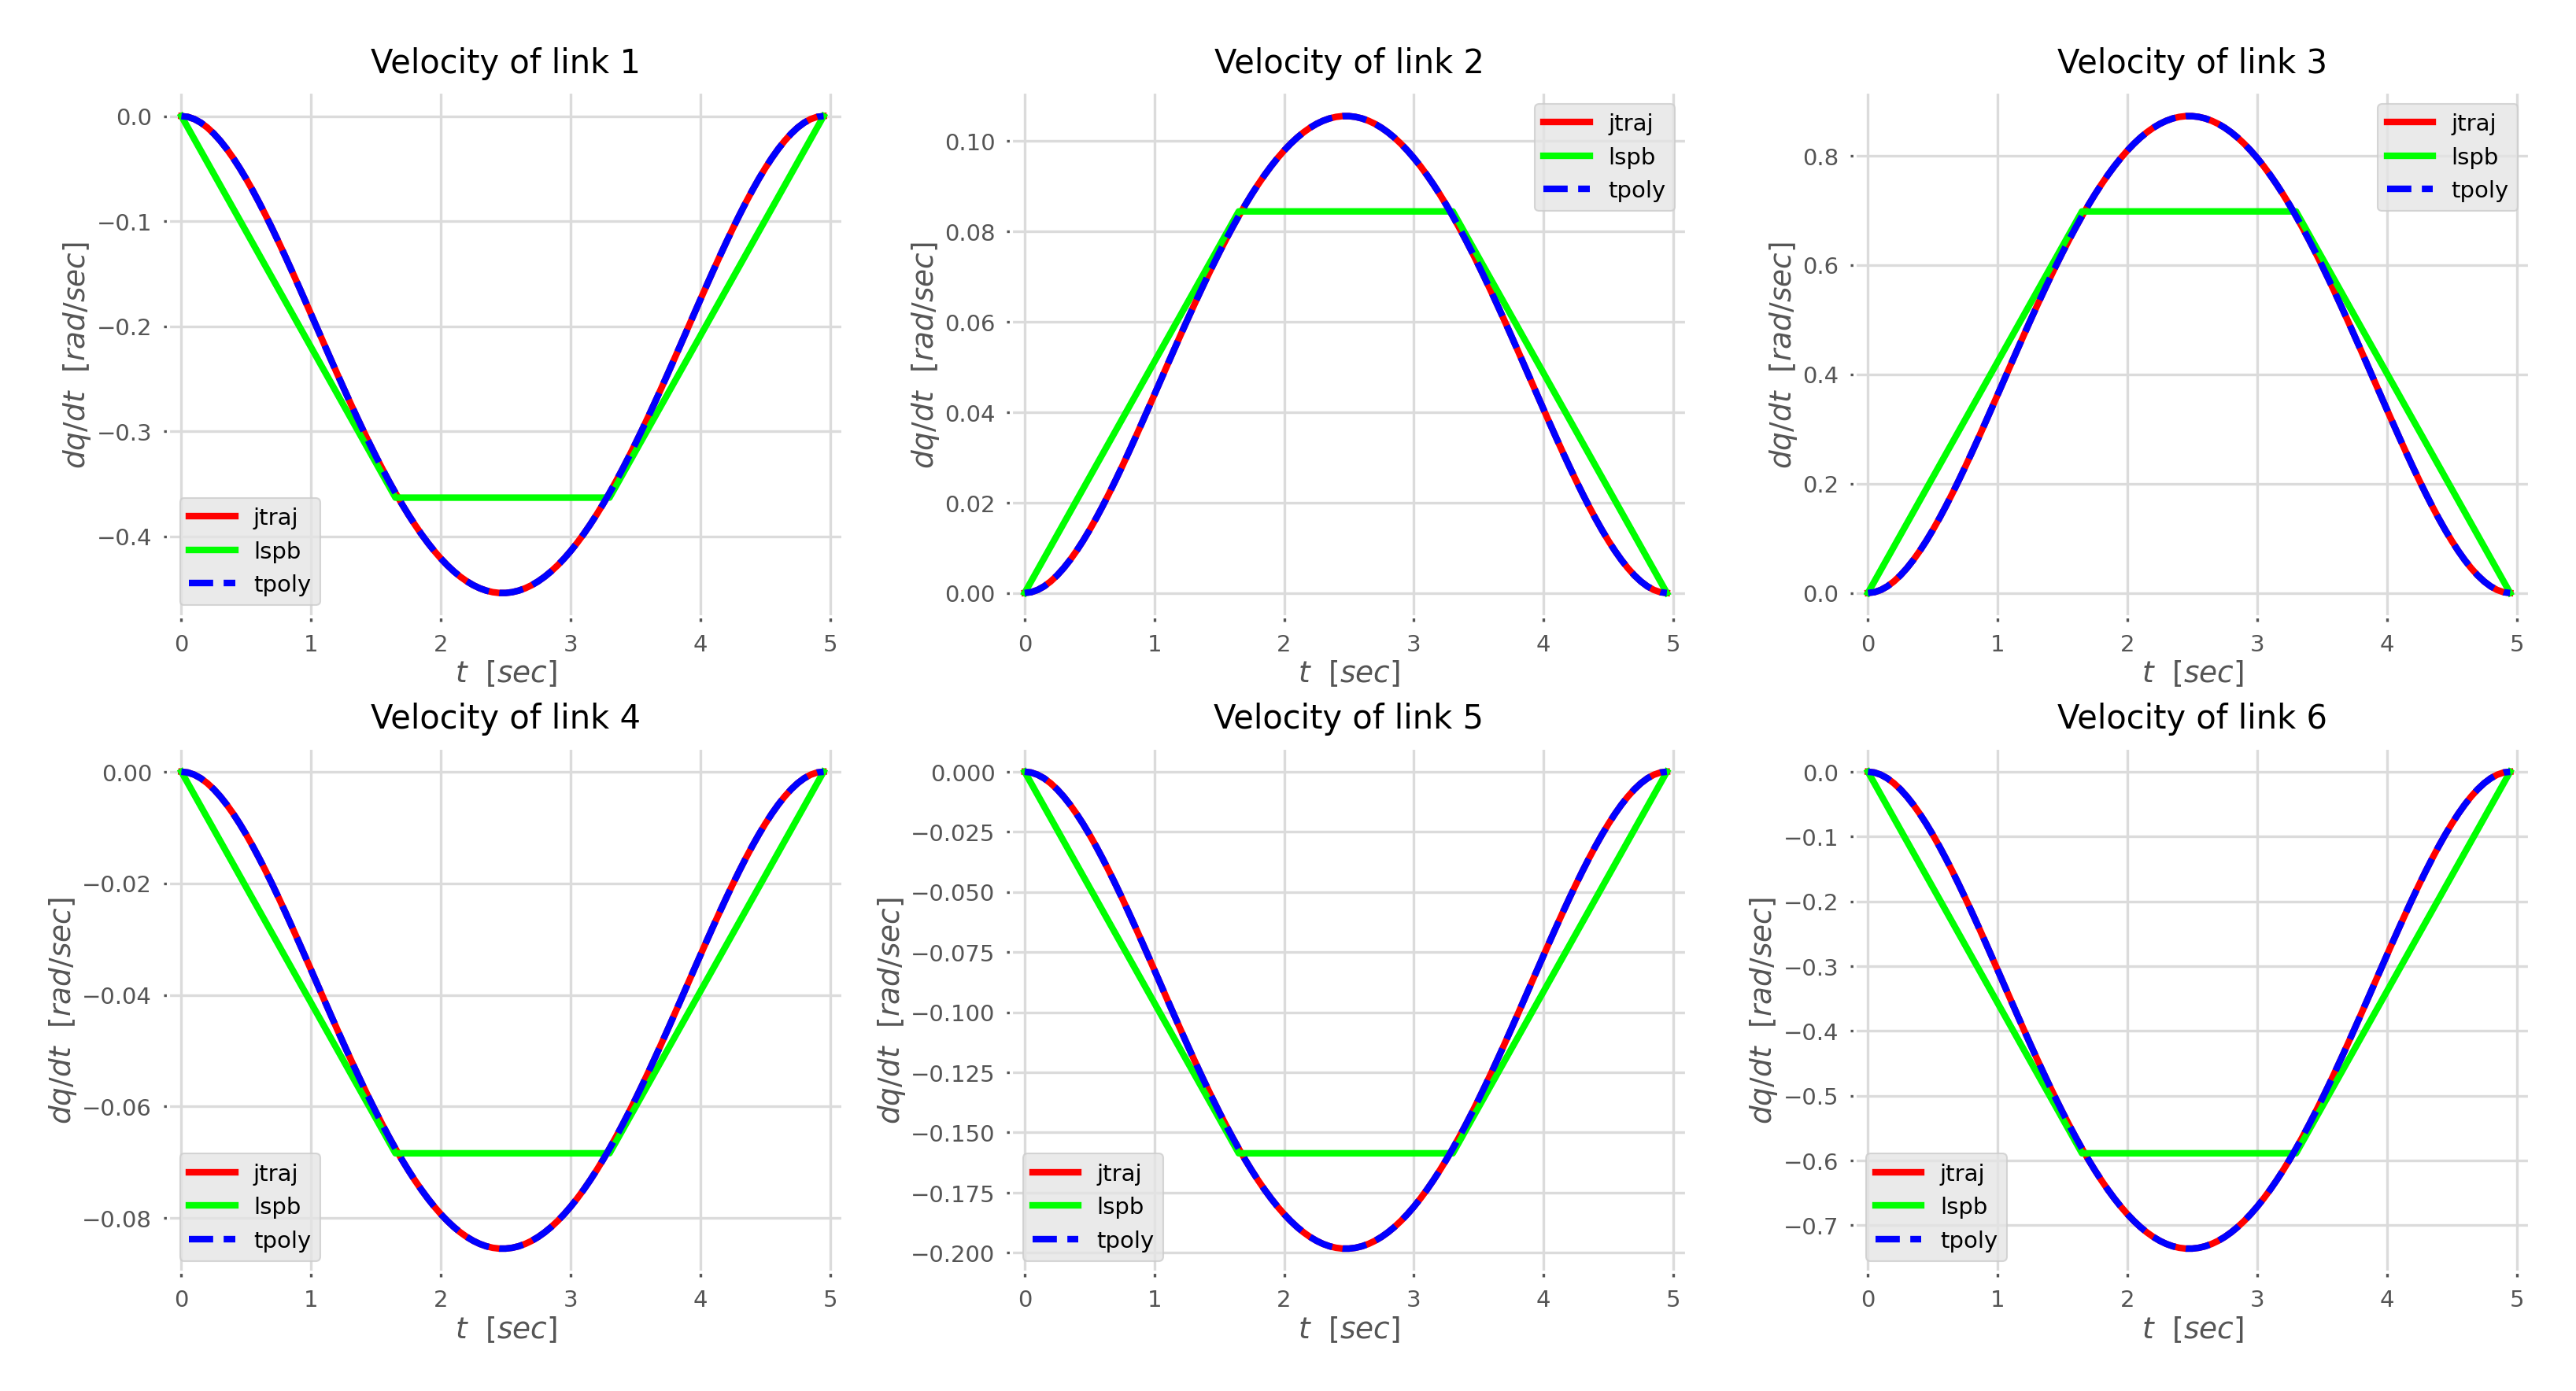


Graphs of acceleration:


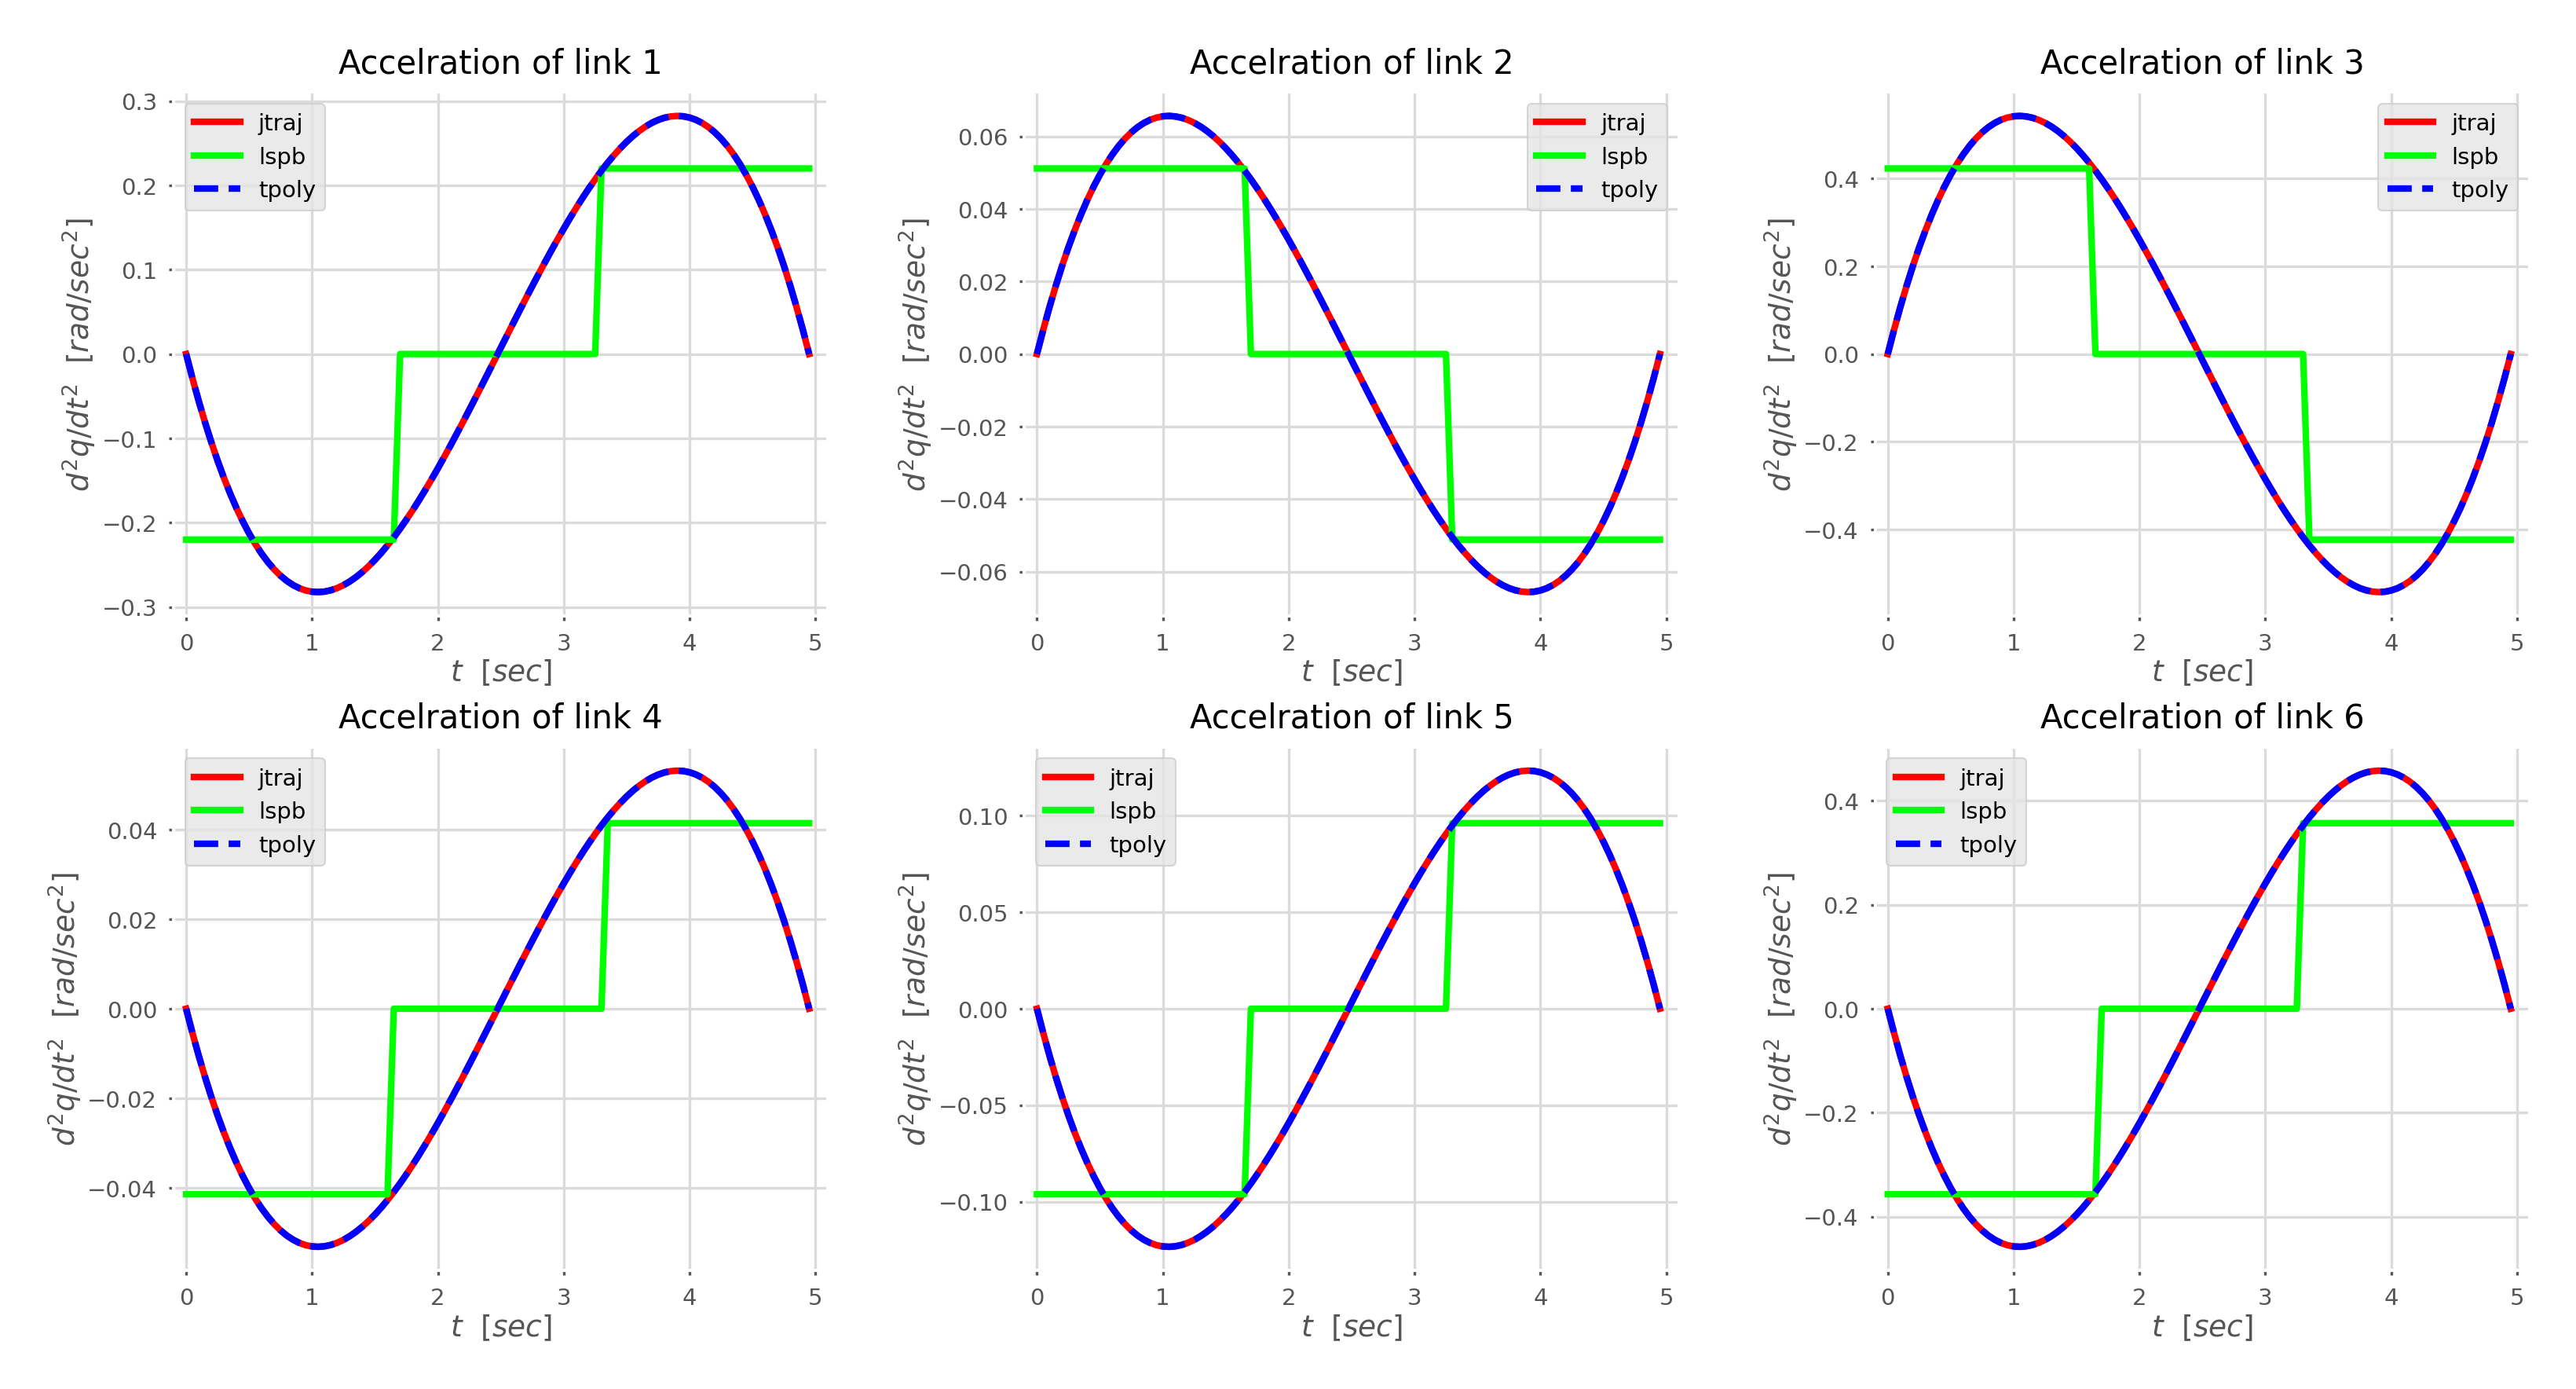

In [47]:
print("Graphs of position:")
display(Image('graphs_pos.png'))
print("\nGraphs of velocity:")
display(Image('graphs_vel.png'))
print("\nGraphs of acceleration:")
display(Image('graphs_acc.png'))

By looking at the graphs we see that the manipulator was able to follow the trajectory since the graphs of position are smooth and continuous for all links.

Joint 1 experiences large changes which suggest significant rotation.

There are no jerks or sudden stops in the velocity graphs which indicates stable motion.

Likewise, the acceleration graphs further prove the stability of the manipulator's motion.

If we compare the methods used for path planning, 'jtraj' and 'mtraj + quintic' show the same result, while 'mtraj + trapezoidal' differed, which is seen more obviously in the velocity and acceleration graphs.